Training Features Shape: (675, 85)
Training Labels Shape: (675,)
---------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

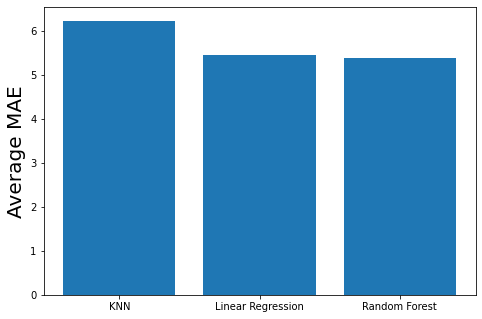

HC_Age_Train Shape: (675,)
predicted_Age_Train Shape: (675, 1)
---------------------------------- Results Without Bias Adjustment -----------------------------------------------
R Squared_Train = 0.27219899861244723
MAE_Train = 5.457700877000921
RMSE_Train = 6.980381274453448
Mean Delta Brain Age for Training set:  0.35683212499122363
          --------------------------------------------------------------------------
R Squared_HC = 0.19048305426847045
MAE_HC = 4.822095381365715
RMSE_HC = 6.270622532173155
Mean Delta Brain Age for HC independent Test set:  -0.07673955277425742
          --------------------------------------------------------------------------
R Squared_MCI = 0.24718436190588045
MAE_MCI = 5.4505819234937
RMSE_MCI = 6.821383707826123
Mean Delta Brain Age for MCI Test set:  0.6231915785394079
          --------------------------------------------------------------------------
R Squared_AD = -0.06469224433050003
MAE_AD = 6.133023168646993
RMSE_AD = 7.788147543393787
Mean 

<Figure size 432x288 with 0 Axes>

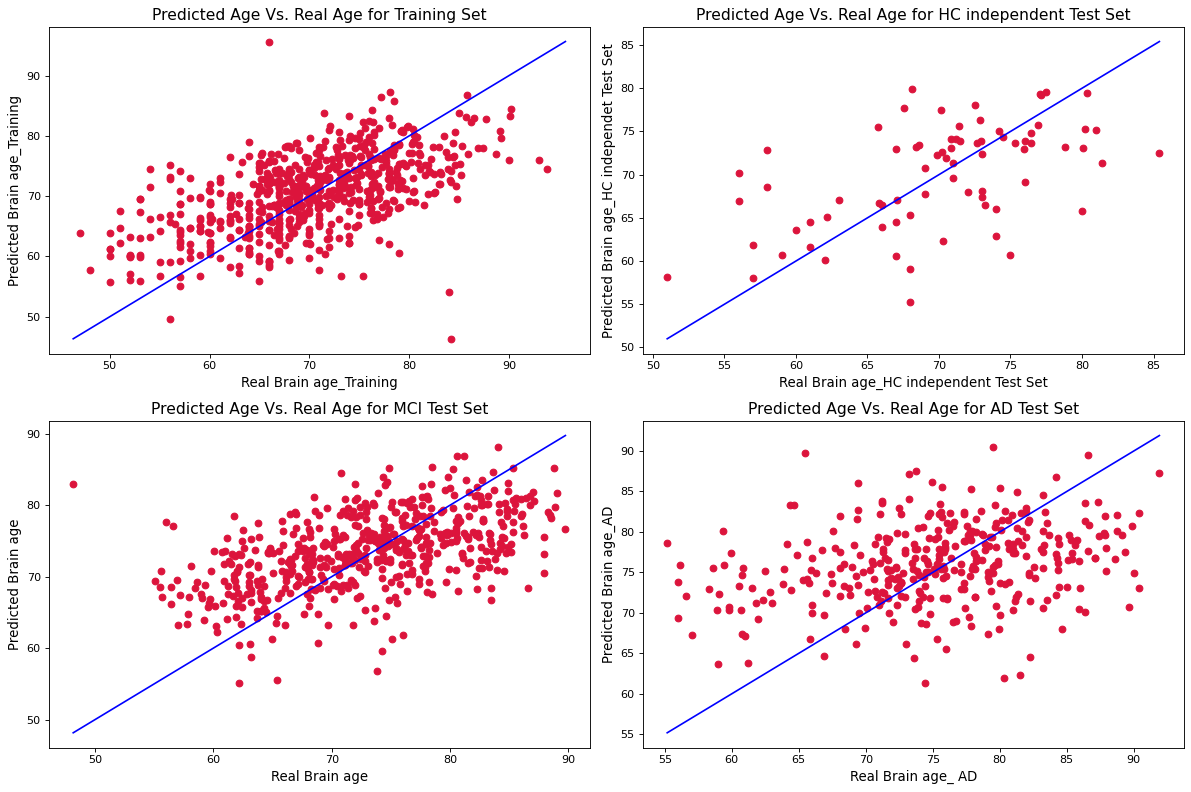

<Figure size 432x288 with 0 Axes>

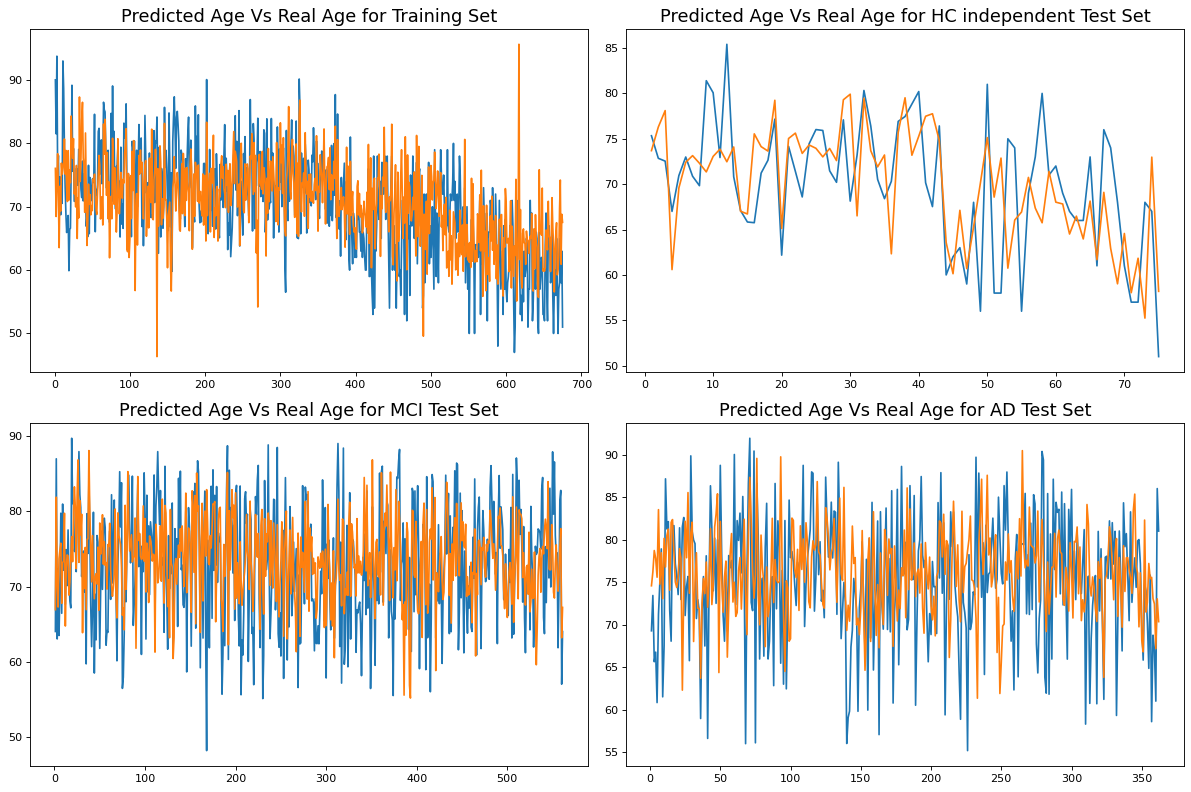

--------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

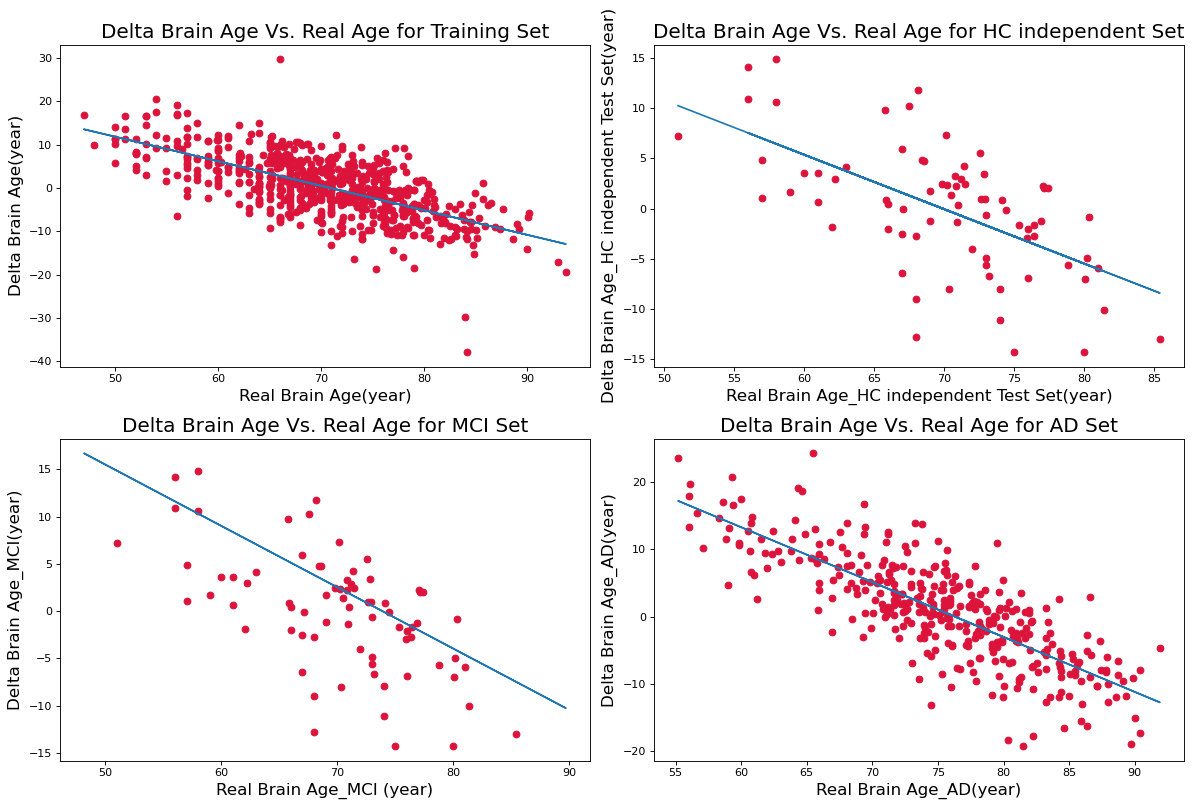

--------------------------------------------------------------------------------------------------------------
-----------------------------------Results With biad Adjustment-----------------------------------------------
----------------------------------------------Cole's Method---------------------------------------------------
-------------------------------Metrics after bias adjustment(Cole's Method)---------------------------------
R Squared_Train = -1.1519002904153286
MAE_Train = 9.271164661228392
RMSE_Train = 12.002836561324289
Mean Delta Brain Age for Training set after bias adjustment using Cole's Method:  5.440125716160293e-14
------------------------------------------------------------------------------------------------------
R Squared_HC = -1.7683915517244015
MAE_HC = 9.373021187532672
RMSE_HC = 11.596086442553286
Mean Delta Brain Age for HC independent Test set after bias adjustment(Cole's Method):  -1.237103588523779
-----------------------------------------------------

<Figure size 432x288 with 0 Axes>

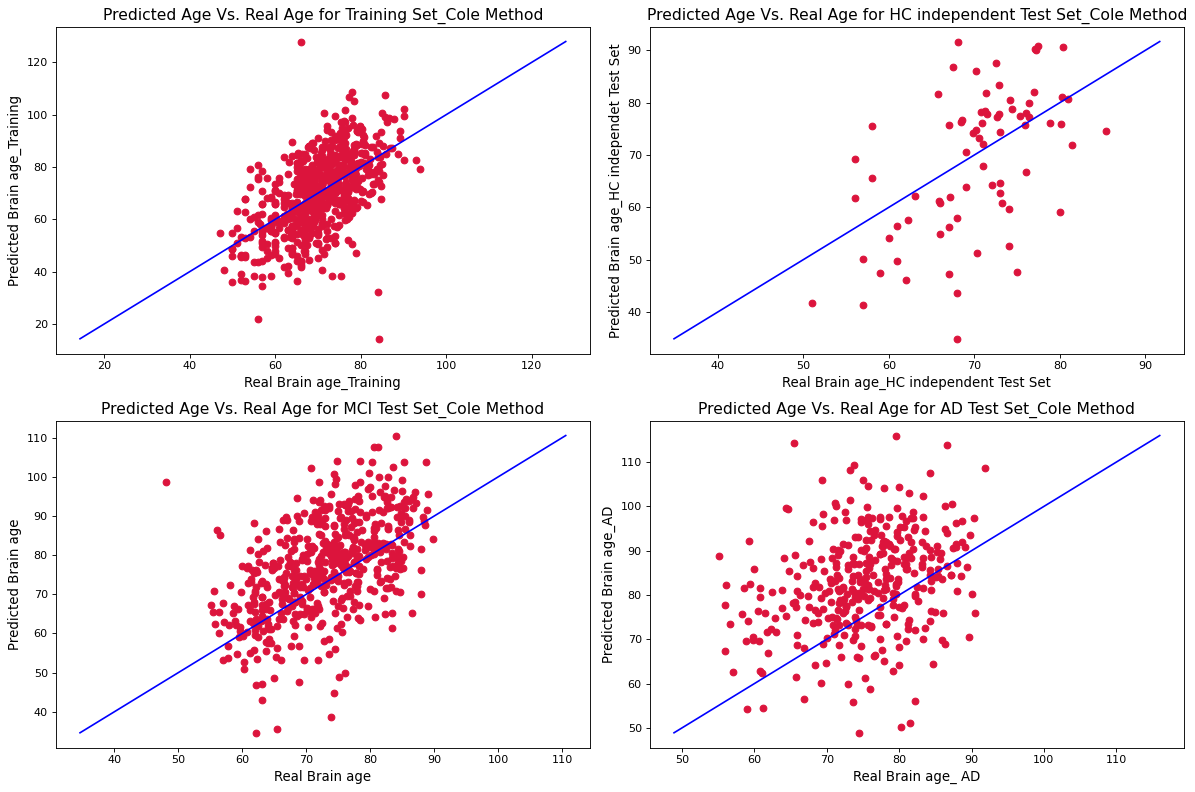

--------------------------------------------------------------------------------------------------------------
----------------------------------------Delta Brain Age Vs. Real Age (Cole's Method)------------------------------------------


<Figure size 432x288 with 0 Axes>

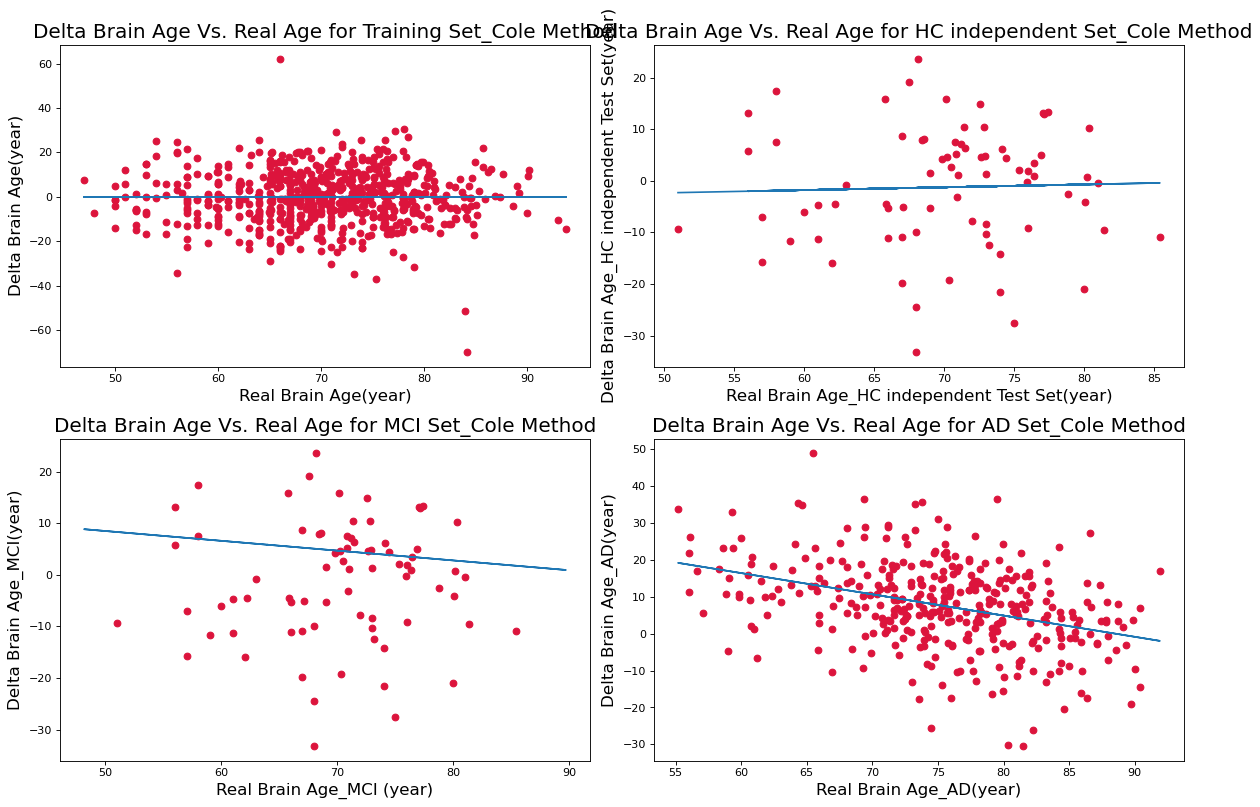

--------------------------------------------------------------------------------------------------------------
----------------------------------------------Proposed Method (Beheshti)--------------------------------------
-------------------------------Metrics after bias adjustment(Beheshti's Method)---------------------------------
R Squared_Train = 0.5941192733626564
MAE_Train = 4.026451173222606
RMSE_Train = 5.212811671488531
Mean Delta Brain Age for Training set:  2.5263741715914673e-16
-------------------------------------------------------------------------------------------------------
R Squared_HC = 0.47783975882371565
MAE_HC = 4.070687290778941
RMSE_HC = 5.036160781036444
Mean Delta Brain Age for HC independent Test set:  -0.5372720016763999
-------------------------------------------------------------------------------------------------------
R Squared_MCI = 0.6146209627288113
MAE_MCI = 3.814220154782819
RMSE_MCI = 4.880588669190952
Mean Delta Brain Age for MCI Test set after

<Figure size 432x288 with 0 Axes>

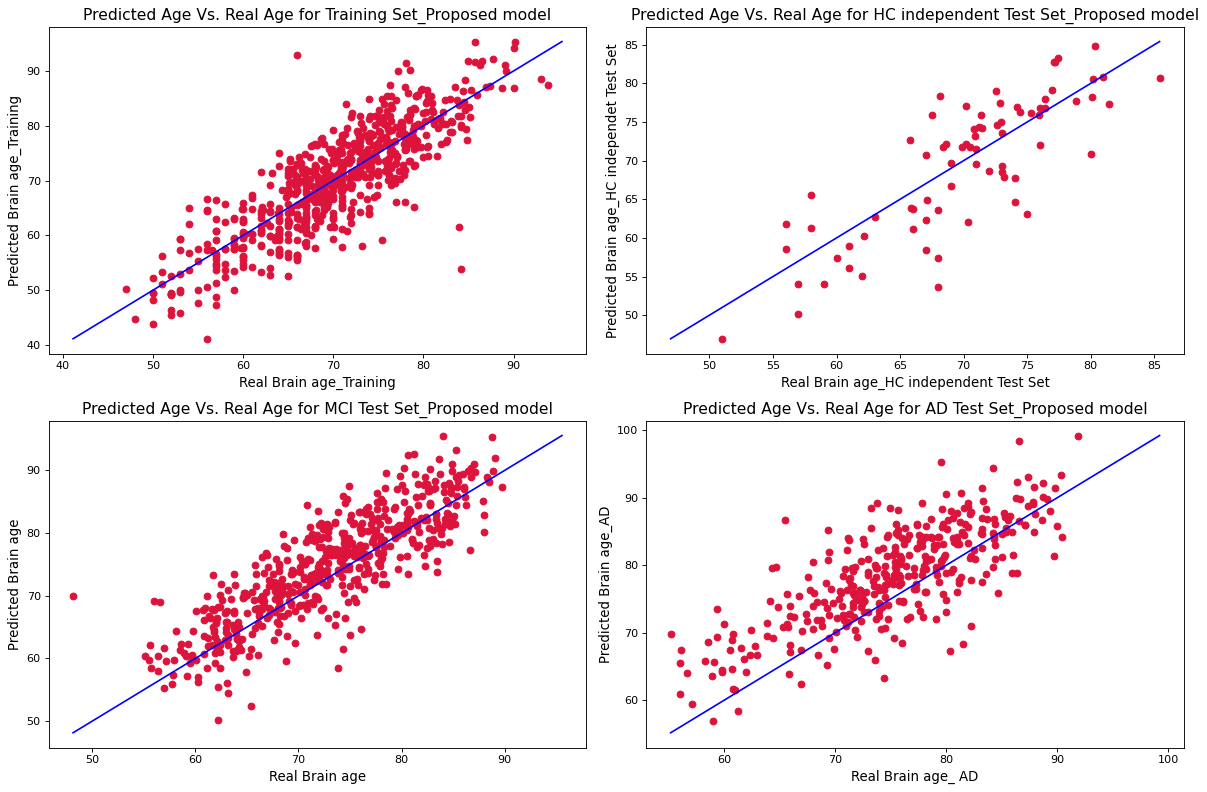

----------------------------------------Delta Brain Age Vs. Real Age(Proposed Model)------------------------------------------


<Figure size 432x288 with 0 Axes>

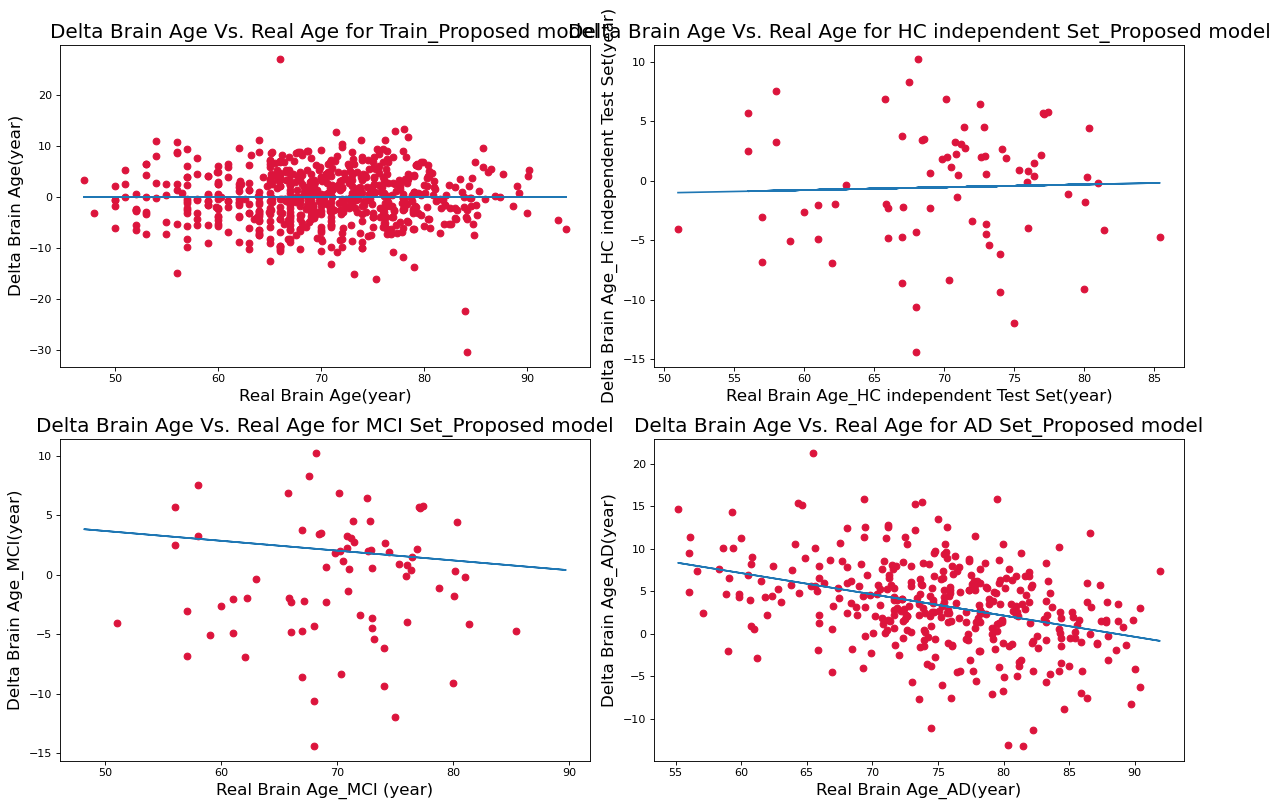

In [25]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings('ignore', 'Solver terminated early.*')

#-------------------------------------------------------------------------------------------------------------
#Loading the Data:
#Loading train data
train_data=pd.read_excel(open(r"C:\Users\simon\Downloads\Data_Mahbobeh.xlsx", 'rb'),sheet_name='Train') 
#train_data.head()
#Loading HC test data
HC_test_data=pd.read_excel(open(r"C:\Users\simon\Downloads\Data_Mahbobeh.xlsx", 'rb'),sheet_name='Test_1') 
#HC_test_data.head()
#Loading MCI test data
MCI_test_data=pd.read_excel(open(r"C:\Users\simon\Downloads\Data_Mahbobeh.xlsx", 'rb'),sheet_name='Test_2') 
#MCI_test_data.head()
#loading AD Test Data
AD_test_data=pd.read_excel(open(r"C:\Users\simon\Downloads\Data_Mahbobeh.xlsx", 'rb'),sheet_name='Test_3') 
#AD_test_data.head()

#-------------------------------------------------------------------------------------------------------------
#Label and Features Definition
#Training Set , 675 HC
#HC age Train: label
#HC Data Train : features
HC_DATA_Train = train_data.iloc[:, 1:-1].values
HC_Age_Train= train_data.iloc[:, 0].values

# Test sets
#Test 1: independent 75 HC
#HC age Test: label
#HC Data Test : features
HC_DATA_Test= HC_test_data.iloc[:, 1:-1].values
HC_Age_Test = HC_test_data.iloc[:, 0].values

#Test 2 : MCI
#MCI data: features
#MCI age : label
MCI_DATA= MCI_test_data.iloc[:, 1:-1].values
MCI_Age = MCI_test_data.iloc[:, 0].values

#Test 3 : AD
#AD_Data is the features
#AD_Age is the label
AD_DATA= AD_test_data.iloc[:, 1:-1].values
AD_Age = AD_test_data.iloc[:, 0].values


#Training Set , 675 HC
#HC age Train: label
#HC Data Train : features
HC_DATA_Train = train_data.iloc[:, 1:-1].values
HC_Age_Train= train_data.iloc[:, 0].values
print('Training Features Shape:', HC_DATA_Train.shape)
print('Training Labels Shape:', HC_Age_Train.shape)

print("---------------------------------------------------------------------------------------------------------")


# call the models
model_1 = KNeighborsRegressor(n_neighbors = 3)
model_2 = LinearRegression() 
model_3 = RandomForestRegressor(n_estimators = 100)


X=HC_DATA_Train
y=HC_Age_Train

k = 10  # Number of folds 
kf = KFold(n_splits=k, random_state=None)


MAE_Model1 = []
MAE_Model2 = []
MAE_Model3 = []
#-------------------------------------------------------------------------------------------------------------
#Evaluating three different models

for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    ## Model 1    
    model_1.fit(X_train,y_train)
    pred_values1 = model_1.predict(X_test)
    MAE_1 = mean_absolute_error(pred_values1 , y_test)
    MAE_Model1.append(MAE_1)
    
    
    ## Model 2    
    model_2.fit(X_train,y_train)
    pred_values2 = model_2.predict(X_test)
    MAE_2 = mean_absolute_error(pred_values2 , y_test)
    MAE_Model2.append(MAE_2)

    ## Model 3    
    model_3.fit(X_train,y_train)
    pred_values3 = model_3.predict(X_test)
    MAE_3 = mean_absolute_error(pred_values3 , y_test)
    MAE_Model3.append(MAE_3)
    
    
    
    
    fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
langs = [ 'KNN','Linear Regression','Random Forest']  
scores = [np.average( MAE_Model1),np.average( MAE_Model2),np.average( MAE_Model3)] 
ax.bar(langs,scores)
plt.ylabel('Average MAE', size=20)
plt.show() 


#-------------------------------------------------------------------------------------------------------------
#10-fold Cross Validation On Train Set

# call the models
model_1 = LinearRegression() 

predicted_Age_Train=np.zeros((len(HC_DATA_Train),1))
X=HC_DATA_Train
y=HC_Age_Train

k = 10  # Number of folds 
kf = KFold(n_splits=k, random_state=None)

for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]  
    model_1.fit(X_train,y_train)
    pred_values1 = model_1.predict(X_test)
    pred_values1.shape=(len(pred_values1),1)
    predicted_Age_Train[test_index]=pred_values1
    

    
print('HC_Age_Train Shape:', HC_Age_Train.shape)
print('predicted_Age_Train Shape:', predicted_Age_Train.shape)

print("---------------------------------- Results Without Bias Adjustment -----------------------------------------------")


# Computing the training performance
import math
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


print ('R Squared_Train =',r2_score(HC_Age_Train, predicted_Age_Train))
print ('MAE_Train =',mean_absolute_error(HC_Age_Train, predicted_Age_Train))
print ('RMSE_Train =',math.sqrt(mean_squared_error(HC_Age_Train, predicted_Age_Train)))

Delta_age_train=predicted_Age_Train -HC_Age_Train
MEANHCs=np.mean(Delta_age_train)
print("Mean Delta Brain Age for Training set: ", MEANHCs)

print("          --------------------------------------------------------------------------")

#Global Model:
Mdl_Global = LinearRegression().fit(HC_DATA_Train, HC_Age_Train)
PredictTest_HC = Mdl_Global.predict(HC_DATA_Test)
#Metrics For HC Independent:
print ('R Squared_HC =',r2_score(HC_Age_Test, PredictTest_HC))
print ('MAE_HC =',mean_absolute_error(HC_Age_Test, PredictTest_HC))
print ('RMSE_HC =',math.sqrt(mean_squared_error(HC_Age_Test, PredictTest_HC)))
Mean_HC_Final=np.mean((PredictTest_HC-HC_Age_Test))
print("Mean Delta Brain Age for HC independent Test set: ", Mean_HC_Final)

print("          --------------------------------------------------------------------------")

#Predict the global model for MCI
PredictTest_MCI=Mdl_Global.predict(MCI_DATA)
#Metrics for MCI:
print ('R Squared_MCI =',r2_score(MCI_Age, PredictTest_MCI))
print ('MAE_MCI =',mean_absolute_error(MCI_Age, PredictTest_MCI))
print ('RMSE_MCI =',math.sqrt(mean_squared_error(MCI_Age, PredictTest_MCI)))
#Delta Brain Age for MCI
Mean_MCI_Final=np.mean((PredictTest_MCI-MCI_Age))
print("Mean Delta Brain Age for MCI Test set: ", Mean_MCI_Final)

print("          --------------------------------------------------------------------------")

#Predict the global model for AD
PredictTest_AD=Mdl_Global.predict(AD_DATA)
#Metrics for AD:
print ('R Squared_AD =',r2_score(AD_Age, PredictTest_AD))
print ('MAE_AD =',mean_absolute_error(AD_Age, PredictTest_AD))
print ('RMSE_AD =',math.sqrt(mean_squared_error(AD_Age, PredictTest_AD)))
#Delta brain age for AD
Mean_AD_Final=np.mean((PredictTest_AD- AD_Age))
print("Mean Delta Brain Age for AD Test set: ", Mean_AD_Final)

print("          --------------------------------------------------------------------------")

print(" Table of Results")
#Plot the table of results:
# import module
from tabulate import tabulate

# assign data
mydata = [
    ["Train Data", r2_score(HC_Age_Train, predicted_Age_Train),
     mean_absolute_error(HC_Age_Train, predicted_Age_Train),
     math.sqrt(mean_squared_error(HC_Age_Train, predicted_Age_Train)), MEANHCs],
    ["Healthy Independent Test",r2_score(HC_Age_Test, PredictTest_HC),
     mean_absolute_error(HC_Age_Test, PredictTest_HC),
     math.sqrt(mean_squared_error(HC_Age_Test, PredictTest_HC)), Mean_HC_Final],
    ["MCI Test", r2_score(MCI_Age, PredictTest_MCI),
     mean_absolute_error(MCI_Age, PredictTest_MCI),
     math.sqrt(mean_squared_error(MCI_Age, PredictTest_MCI)), Mean_MCI_Final],
      ["AD Test", r2_score(AD_Age, PredictTest_AD), mean_absolute_error(AD_Age, PredictTest_AD),
       math.sqrt(mean_squared_error(AD_Age, PredictTest_AD)), Mean_AD_Final]
]
 
# create header
head = ["Dataset", "R_ Squared", "MAE", "RMSE", "Delta Brain Age"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

print("------------------------------------------------------------------------------------------------------")


#PLOT:
#Training
list1=list(range(1, 676))
x1 = list1
y1 = HC_Age_Train
x2 = list1
y2 = predicted_Age_Train
x3=list1
y3=Delta_age_train

#HC Test
Delta_brain_Age_HC=PredictTest_HC-HC_Age_Test
list2=list(range(1, 76))
x4 = list2
y4 = HC_Age_Test
x5 = list2
y5 = PredictTest_HC
x6=list2
y6=Delta_brain_Age_HC

#MCI Test
Delta_brain_Age_MCI=PredictTest_MCI-MCI_Age
list3=list(range(1, 562))
x7 = list3
y7 = MCI_Age
x8 = list3
y8 = PredictTest_MCI
x9=list3
y9=Delta_brain_Age_MCI

#AD Test:
Delta_brain_Age_AD=PredictTest_AD- AD_Age
list4=list(range(1, 363))
x10 = list4
y10 = AD_Age
x11 = list4
y11 =  PredictTest_AD
x12=list4
y12=Delta_brain_Age_AD

#----------------------------------------------------------
#Plot predicted vs real age without bias adjustment
ig = plt.figure()
figure(figsize=(15,10), dpi=80)

plt.subplot(2, 2, 1)
plt.scatter(HC_Age_Train, predicted_Age_Train, c='crimson')
p1 = max(max(predicted_Age_Train), max(HC_Age_Train))
p2 = min(min(predicted_Age_Train), min(HC_Age_Train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_Training', fontsize=12)
plt.ylabel('Predicted Brain age_Training', fontsize=12)
plt.title('Predicted Age Vs. Real Age for Training Set', fontsize=14)
plt.tight_layout()
#plt.axis('equal')

plt.subplot(2, 2, 2)
plt.scatter(HC_Age_Test, PredictTest_HC, c='crimson')
p1 = max(max(PredictTest_HC), max(HC_Age_Test))
p2 = min(min(PredictTest_HC), min(HC_Age_Test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_HC independent Test Set', fontsize=12)
plt.ylabel('Predicted Brain age_HC independet Test Set', fontsize=12)
plt.title('Predicted Age Vs. Real Age for HC independent Test Set', fontsize=14)
plt.tight_layout()
#plt.axis('equal')



plt.subplot(2, 2, 3)
plt.scatter(MCI_Age, PredictTest_MCI, c='crimson')
p1 = max(max(PredictTest_MCI), max(MCI_Age))
p2 = min(min(PredictTest_MCI), min(MCI_Age))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age', fontsize=12)
plt.ylabel('Predicted Brain age', fontsize=12)
plt.title('Predicted Age Vs. Real Age for MCI Test Set', fontsize=14)
plt.tight_layout()
#plt.axis('equal')

plt.subplot(2, 2, 4)
plt.scatter(AD_Age, PredictTest_AD, c='crimson')
p1 = max(max(PredictTest_AD), max(AD_Age))
p2 = min(min(PredictTest_AD), min(AD_Age))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_ AD', fontsize=12)
plt.ylabel('Predicted Brain age_AD', fontsize=12)
plt.title('Predicted Age Vs. Real Age for AD Test Set', fontsize=14)
plt.tight_layout()
#plt.axis('equal')

print("--------------------------------------------------------------------------------------------------------------")
#Predicted vs real age
fig = plt.figure()
figure(figsize=(15,10), dpi=80)
plt.subplot(2, 2, 1)
plt.plot(x1, y1, label = "Real Brain Age_Train")
plt.plot(x2, y2, label = "Predicted Brain Age_Train")
plt.tight_layout()
plt.title('Predicted Age Vs Real Age for Training Set', fontsize=16)

plt.subplot(2, 2, 2)
plt.plot(x4, y4, label = "Real Brain Age_HC Independent")
plt.plot(x5, y5, label = "Predicted Brain Age_HC Independent")
plt.tight_layout()
plt.title('Predicted Age Vs Real Age for HC independent Test Set', fontsize=16)

plt.subplot(2, 2, 3)
plt.plot(x7, y7, label = "Real Brain Age_MCI")
plt.plot(x8, y8, label = "Predicted Brain Age_MCI")
plt.tight_layout()
plt.title('Predicted Age Vs Real Age for MCI Test Set', fontsize=16)

plt.subplot(2, 2, 4)
plt.plot(x10, y10, label = "Delta Brain Age_AD")
plt.plot(x11, y11, label = "Delta Brain Age_AD")
plt.title('Predicted Age Vs Real Age for AD Test Set', fontsize=16)
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------------------------------------------------------")
#Delta brain age vs real age
ig = plt.figure()
figure(figsize=(15,10), dpi=80)
predicted_Age_Train.shape=(675,)
Delta_age_train=predicted_Age_Train -HC_Age_Train
plt.subplot(2, 2, 1)
plt.scatter(HC_Age_Train, Delta_age_train, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(HC_Age_Train, Delta_age_train, 1)
#add linear regression line to scatterplot 
plt.plot(HC_Age_Train, m*HC_Age_Train+b)
plt.xlabel('Real Brain Age(year)', fontsize=15)
plt.ylabel('Delta Brain Age(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for Training Set', fontsize=18)
#plt.axis('equal')

plt.subplot(2, 2, 2)
Delta_brain_Age_HC=PredictTest_HC-HC_Age_Test
plt.scatter(HC_Age_Test, Delta_brain_Age_HC, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(HC_Age_Test, Delta_brain_Age_HC, 1)
#add linear regression line to scatterplot 
plt.plot(HC_Age_Test, m*HC_Age_Test+b)
plt.xlabel('Real Brain Age_HC independent Test Set(year)', fontsize=15)
plt.ylabel('Delta Brain Age_HC independent Test Set(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for HC independent Set', fontsize=18)
#plt.axis('equal')


plt.subplot(2, 2, 3)
Delta_brain_Age_MCI=PredictTest_MCI-MCI_Age
plt.scatter(HC_Age_Test, Delta_brain_Age_HC, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(MCI_Age, Delta_brain_Age_MCI, 1)
#add linear regression line to scatterplot 
plt.plot(MCI_Age, m*MCI_Age+b)
plt.xlabel('Real Brain Age_MCI (year)', fontsize=15)
plt.ylabel('Delta Brain Age_MCI(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for MCI Set', fontsize=18)
#plt.axis('equal')

plt.subplot(2, 2, 4)
Delta_brain_Age_AD=PredictTest_AD- AD_Age
plt.scatter(AD_Age, Delta_brain_Age_AD, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(AD_Age, Delta_brain_Age_AD, 1)
#add linear regression line to scatterplot 
plt.plot(AD_Age, m*AD_Age+b)
plt.xlabel('Real Brain Age_AD(year)', fontsize=15)
plt.ylabel('Delta Brain Age_AD(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for AD Set', fontsize=18)
#plt.axis('equal')
#set the spacing between subplots
plt.tight_layout()
plt.show()



print("--------------------------------------------------------------------------------------------------------------")
print("-----------------------------------Results With biad Adjustment-----------------------------------------------")
print("----------------------------------------------Cole's Method---------------------------------------------------")

#Cole's Method:State=2
#First we find the slope and intercept of the regression line in the Predicted age vs real age plot(for training set):
#a:slope #b:intercept
a1,b1= np.polyfit(HC_Age_Train, predicted_Age_Train, 1)
#print("Slope (a1)= ", a1, "\nIntercept (b1)= ", b1 )

#implementing the formula on train
predicted_age_train_cole=list()
for age in predicted_Age_Train:
    predicted_age_train_cole.append((age-b1)/a1)

predicted_age_train_cole=np.asarray(predicted_age_train_cole)

#implementing The formula on HC Test
PredictTest_HC_cole=list()
for age in PredictTest_HC:
    PredictTest_HC_cole.append((age-b1)/a1)

PredictTest_HC_cole=np.asarray(PredictTest_HC_cole)

#implementing the cole's formula on MCI Test
PredictTest_MCI_cole=list()
for age in PredictTest_MCI:
    PredictTest_MCI_cole.append((age-b1)/a1)
    
PredictTest_MCI_cole=np.asarray(PredictTest_MCI_cole)

#implementing the cole's formula on AD Test
PredictTest_AD_cole=list()
for age in PredictTest_AD:
    PredictTest_AD_cole.append((age-b1)/a1)
    
PredictTest_AD_cole=np.asarray(PredictTest_AD_cole) 

#Metrics after bias adjustment:
print("-------------------------------Metrics after bias adjustment(Cole's Method)---------------------------------")
#Metrics for Train set:
print ('R Squared_Train =',r2_score(HC_Age_Train, predicted_age_train_cole))
print ('MAE_Train =',mean_absolute_error(HC_Age_Train, predicted_age_train_cole))
print ('RMSE_Train =',math.sqrt(mean_squared_error(HC_Age_Train, predicted_age_train_cole)))
#Delta Brain Age
Delta_age_train=predicted_age_train_cole -HC_Age_Train
MEANHCs=np.mean(Delta_age_train)
print("Mean Delta Brain Age for Training set after bias adjustment using Cole's Method: ", MEANHCs)
print("------------------------------------------------------------------------------------------------------")
#Metrics For HC Independent:
print ('R Squared_HC =',r2_score(HC_Age_Test, PredictTest_HC_cole))
print ('MAE_HC =',mean_absolute_error(HC_Age_Test, PredictTest_HC_cole))
print ('RMSE_HC =',math.sqrt(mean_squared_error(HC_Age_Test, PredictTest_HC_cole)))
#Delta Brain Age
Mean_HC_Final=np.mean((PredictTest_HC_cole-HC_Age_Test))
print("Mean Delta Brain Age for HC independent Test set after bias adjustment(Cole's Method): ", Mean_HC_Final)
print("------------------------------------------------------------------------------------------------------")

#Metrics for MCI:
print ('R Squared_MCI =',r2_score(MCI_Age, PredictTest_MCI_cole))
print ('MAE_MCI =',mean_absolute_error(MCI_Age, PredictTest_MCI_cole))
print ('RMSE_MCI =',math.sqrt(mean_squared_error(MCI_Age, PredictTest_MCI_cole)))
#Delta Brain Age for MCI
Mean_MCI_Final=np.mean((PredictTest_MCI_cole-MCI_Age))
print("Mean Delta Brain Age for MCI Test set after bias adjustment(Cole's Method): ", Mean_MCI_Final)
print("-------------------------------------------------------------------------------------------------------")

#Metrics for AD:
print ('R Squared_AD =',r2_score(AD_Age, PredictTest_AD_cole))
print ('MAE_AD =',mean_absolute_error(AD_Age, PredictTest_AD_cole))
print ('RMSE_AD =',math.sqrt(mean_squared_error(AD_Age, PredictTest_AD_cole)))
#Delta brain age for AD
Mean_AD_Final=np.mean((PredictTest_AD_cole- AD_Age))
print("Mean Delta Brain Age for AD Test set after bias adjustment(Cole's Method): ", Mean_AD_Final)
print("--------------------------------------------------------------------------------------------------------")

print(" Table of Results_ After Bias Adjustment_Cole's Method")
#Plot the table of results:
# import module
from tabulate import tabulate

# assign data
mydata = [
    ["Train Data", r2_score(HC_Age_Train, predicted_age_train_cole),
     mean_absolute_error(HC_Age_Train, predicted_age_train_cole),
     math.sqrt(mean_squared_error(HC_Age_Train, predicted_age_train_cole)), MEANHCs],
    ["Healthy Independent Test",r2_score(HC_Age_Test, PredictTest_HC_cole),
     mean_absolute_error(HC_Age_Test, PredictTest_HC_cole),
     math.sqrt(mean_squared_error(HC_Age_Test, PredictTest_HC_cole)), Mean_HC_Final],
    ["MCI Test", r2_score(MCI_Age, PredictTest_MCI_cole),
     mean_absolute_error(MCI_Age, PredictTest_MCI_cole),
     math.sqrt(mean_squared_error(MCI_Age, PredictTest_MCI_cole)), Mean_MCI_Final],
      ["AD Test", r2_score(AD_Age, PredictTest_AD_cole), mean_absolute_error(AD_Age, PredictTest_AD_cole),
       math.sqrt(mean_squared_error(AD_Age, PredictTest_AD_cole)), Mean_AD_Final]
]
 
# create header
head = ["Dataset", "R_ Squared_cole", "MAE_cole", "RMSE_cole", "Delta Brain Age_cole"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

print("--------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------Plots-----------------------------------------------------------")
print("----------------------------------------Predicted Age Vs. Real Age--------------------------------------------")
#Plots
ig = plt.figure()
figure(figsize=(15,10), dpi=80)

plt.subplot(2, 2, 1)
plt.scatter(HC_Age_Train, predicted_age_train_cole, c='crimson')
p1 = max(max(predicted_age_train_cole), max(HC_Age_Train))
p2 = min(min(predicted_age_train_cole), min(HC_Age_Train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_Training', fontsize=12)
plt.ylabel('Predicted Brain age_Training', fontsize=12)
plt.title('Predicted Age Vs. Real Age for Training Set_Cole Method', fontsize=14)
#plt.axis('equal')

plt.subplot(2, 2, 2)
plt.scatter(HC_Age_Test, PredictTest_HC_cole, c='crimson')
p1 = max(max(PredictTest_HC_cole), max(HC_Age_Test))
p2 = min(min(PredictTest_HC_cole), min(HC_Age_Test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_HC independent Test Set', fontsize=12)
plt.ylabel('Predicted Brain age_HC independet Test Set', fontsize=12)
plt.title('Predicted Age Vs. Real Age for HC independent Test Set_Cole Method', fontsize=14)
#plt.axis('equal')


plt.subplot(2, 2, 3)
plt.scatter(MCI_Age, PredictTest_MCI_cole, c='crimson')
p1 = max(max(PredictTest_MCI_cole), max(MCI_Age))
p2 = min(min(PredictTest_MCI_cole), min(MCI_Age))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age', fontsize=12)
plt.ylabel('Predicted Brain age', fontsize=12)
plt.title('Predicted Age Vs. Real Age for MCI Test Set_Cole Method', fontsize=14)
#plt.axis('equal')

plt.subplot(2, 2, 4)
plt.scatter(AD_Age, PredictTest_AD_cole, c='crimson')
p1 = max(max(PredictTest_AD_cole), max(AD_Age))
p2 = min(min(PredictTest_AD_cole), min(AD_Age))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_ AD', fontsize=12)
plt.ylabel('Predicted Brain age_AD', fontsize=12)
plt.title('Predicted Age Vs. Real Age for AD Test Set_Cole Method', fontsize=14)
plt.tight_layout()
#plt.axis('equal')
plt.show()
      
print("--------------------------------------------------------------------------------------------------------------")
print("----------------------------------------Delta Brain Age Vs. Real Age (Cole's Method)--------------------------")
ig = plt.figure()
figure(figsize=(15,10), dpi=80)
predicted_Age_Train.shape=(675,)
Delta_age_train=predicted_age_train_cole-HC_Age_Train
plt.subplot(2, 2, 1)
plt.scatter(HC_Age_Train, Delta_age_train, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(HC_Age_Train, Delta_age_train, 1)
#add linear regression line to scatterplot 
plt.plot(HC_Age_Train, m*HC_Age_Train+b)
plt.xlabel('Real Brain Age(year)', fontsize=15)
plt.ylabel('Delta Brain Age(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for Training Set_Cole Method', fontsize=18)
#plt.axis('equal')

plt.subplot(2, 2, 2)
Delta_brain_Age_HC=PredictTest_HC_cole-HC_Age_Test
plt.scatter(HC_Age_Test, Delta_brain_Age_HC, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(HC_Age_Test, Delta_brain_Age_HC, 1)
#add linear regression line to scatterplot 
plt.plot(HC_Age_Test, m*HC_Age_Test+b)
plt.xlabel('Real Brain Age_HC independent Test Set(year)', fontsize=15)
plt.ylabel('Delta Brain Age_HC independent Test Set(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for HC independent Set_Cole Method', fontsize=18)
#plt.axis('equal')


plt.subplot(2, 2, 3)
Delta_brain_Age_MCI=PredictTest_MCI_cole-MCI_Age
plt.scatter(HC_Age_Test, Delta_brain_Age_HC, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(MCI_Age, Delta_brain_Age_MCI, 1)
#add linear regression line to scatterplot 
plt.plot(MCI_Age, m*MCI_Age+b)
plt.xlabel('Real Brain Age_MCI (year)', fontsize=15)
plt.ylabel('Delta Brain Age_MCI(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for MCI Set_Cole Method', fontsize=18)
#plt.axis('equal')

plt.subplot(2, 2, 4)
Delta_brain_Age_AD=PredictTest_AD_cole- AD_Age
plt.scatter(AD_Age, Delta_brain_Age_AD, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(AD_Age, Delta_brain_Age_AD, 1)
#add linear regression line to scatterplot 
plt.plot(AD_Age, m*AD_Age+b)
plt.xlabel('Real Brain Age_AD(year)', fontsize=15)
plt.ylabel('Delta Brain Age_AD(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for AD Set_Cole Method', fontsize=18)
#plt.axis('equal')
#set the spacing between subplots
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------Proposed Method (Beheshti)--------------------------------------")

#Proposed Model(Beheshti's) State=3
#First we find the slope and intercept of the regression line in the Delta brain age vs real age plot(for training set):
#a2:slope #b2:intercept
#slope and intercept of the regression line
a2,b2= np.polyfit(HC_Age_Train, predicted_Age_Train -HC_Age_Train, 1)
#print("Slope (a)= ", a2, "\nIntercept (b)= ", b2 )

#Implementing the proposed model (State=3) on Training set:
Offset=list()
for age in HC_Age_Train:
    age=(age*a2)+b2
    Offset.append(age)
#Offset
Predicted_age_train_Beheshti=predicted_Age_Train-Offset

#Implementing the proposed model (State=3) on HC Test set:
#On HC:
PredictTest_HC_Beheshti=list()
Offset_HC=list()
for age in HC_Age_Test:
    age=(age*a2)+b2
    Offset_HC.append(age)
#Offset
            
PredictTest_HC_Beheshti= PredictTest_HC-Offset_HC      
PredictTest_HC_Beheshti=np.asarray(PredictTest_HC_Beheshti)

#Implementing the proposed model (State=3)  On MCI:
PredictTest_MCI_Beheshti=list()
Offset_MCI=list()
for age in MCI_Age:
    age=(age*a2)+b2
    Offset_MCI.append(age)
#Offset
            
PredictTest_MCI_Beheshti= PredictTest_MCI-Offset_MCI     
PredictTest_MCI_Beheshti=np.asarray(PredictTest_MCI_Beheshti)

##Implementing the proposed model (State=3) On AD:
PredictTest_AD_Beheshti=list()
Offset_AD=list()
for age in AD_Age:
    age=(age*a2)+b2
    Offset_AD.append(age)
#Offset
            
PredictTest_AD_Beheshti= PredictTest_AD-Offset_AD    
PredictTest_AD_Beheshti=np.asarray(PredictTest_AD_Beheshti)

#Metrics after bias adjustment:
print("-------------------------------Metrics after bias adjustment(Beheshti's Method)------------------------")
#Metrics for training set
print ('R Squared_Train =',r2_score(HC_Age_Train, Predicted_age_train_Beheshti))
print ('MAE_Train =',mean_absolute_error(HC_Age_Train, Predicted_age_train_Beheshti))
print ('RMSE_Train =',math.sqrt(mean_squared_error(HC_Age_Train, Predicted_age_train_Beheshti)))

Delta_age_train_Beheshti=Predicted_age_train_Beheshti -HC_Age_Train
MEANHCs=np.mean(Delta_age_train_Beheshti)
print("Mean Delta Brain Age for Training set: ", MEANHCs)
print("-------------------------------------------------------------------------------------------------------")

#Metrics for HC:
#Metrics
print ('R Squared_HC =',r2_score(HC_Age_Test, PredictTest_HC_Beheshti))
print ('MAE_HC =',mean_absolute_error(HC_Age_Test, PredictTest_HC_Beheshti))
print ('RMSE_HC =',math.sqrt(mean_squared_error(HC_Age_Test, PredictTest_HC_Beheshti)))

#Delta Brain Age HC Test
Delta_Age_HC_Beheshti=np.mean((PredictTest_HC_Beheshti-HC_Age_Test))
print("Mean Delta Brain Age for HC independent Test set: ", Delta_Age_HC_Beheshti)
print("-------------------------------------------------------------------------------------------------------")

#Metrics for MCI:
print ('R Squared_MCI =',r2_score(MCI_Age, PredictTest_MCI_Beheshti))
print ('MAE_MCI =',mean_absolute_error(MCI_Age, PredictTest_MCI_Beheshti))
print ('RMSE_MCI =',math.sqrt(mean_squared_error(MCI_Age, PredictTest_MCI_Beheshti)))
#Delta Brain Age for MCI
Delta_Age_MCI_Beheshti=np.mean((PredictTest_MCI_Beheshti-MCI_Age))
print("Mean Delta Brain Age for MCI Test set after bias adjustment(Beheshti): ", Delta_Age_MCI_Beheshti)
print("-------------------------------------------------------------------------------------------------------")

#Metrics for AD:
print ('R Squared_AD =',r2_score(AD_Age, PredictTest_AD_Beheshti))
print ('MAE_AD =',mean_absolute_error(AD_Age, PredictTest_AD_Beheshti))
print ('RMSE_AD =',math.sqrt(mean_squared_error(AD_Age, PredictTest_AD_Beheshti)))
#Delta brain age for AD
Delta_Age_AD_Beheshti=np.mean((PredictTest_AD_Beheshti- AD_Age))
print("Mean Delta Brain Age for AD Test set after bias adjustment(Beheshti's Method): ", Delta_Age_AD_Beheshti)
print("-------------------------------------------------------------------------------------------------------")

print(" Table of Results_ After Bias Adjustment_Proposed Method(Beheshti)")
#Plot the table of results:
# import module
from tabulate import tabulate

# assign data
mydata = [
    ["Train Data", r2_score(HC_Age_Train, Predicted_age_train_Beheshti),
     mean_absolute_error(HC_Age_Train, Predicted_age_train_Beheshti),
     math.sqrt(mean_squared_error(HC_Age_Train, Predicted_age_train_Beheshti)), MEANHCs],
    ["Healthy Independent Test",r2_score(HC_Age_Test, PredictTest_HC_Beheshti),
     mean_absolute_error(HC_Age_Test, PredictTest_HC_Beheshti),
     math.sqrt(mean_squared_error(HC_Age_Test, PredictTest_HC_Beheshti)), Delta_Age_HC_Beheshti],
    ["MCI Test", r2_score(MCI_Age, PredictTest_MCI_Beheshti),
     mean_absolute_error(MCI_Age, PredictTest_MCI_Beheshti),
     math.sqrt(mean_squared_error(MCI_Age, PredictTest_MCI_Beheshti)), Delta_Age_MCI_Beheshti],
      ["AD Test", r2_score(AD_Age, PredictTest_AD_Beheshti), mean_absolute_error(AD_Age, PredictTest_AD_Beheshti),
       math.sqrt(mean_squared_error(AD_Age, PredictTest_AD_Beheshti)), Delta_Age_AD_Beheshti]
]
 
# create header
head = ["Dataset", "R_ Squared_Beheshti", "MAE_Beheshti", "RMSE_Beheshti", "Delta Brain Age_Beheshti"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

print("----------------------------------------------Plots-----------------------------------------------------------")
print("----------------------------------------Predicted Age Vs. Real Age (Proposed Model)---------------------------")
#Plots
ig = plt.figure()
figure(figsize=(15,10), dpi=80)

plt.subplot(2, 2, 1)
plt.scatter(HC_Age_Train, Predicted_age_train_Beheshti, c='crimson')
p1 = max(max(Predicted_age_train_Beheshti), max(HC_Age_Train))
p2 = min(min(Predicted_age_train_Beheshti), min(HC_Age_Train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_Training', fontsize=12)
plt.ylabel('Predicted Brain age_Training', fontsize=12)
plt.title('Predicted Age Vs. Real Age for Training Set_Proposed model', fontsize=14)
#plt.axis('equal')

plt.subplot(2, 2, 2)
plt.scatter(HC_Age_Test, PredictTest_HC_Beheshti, c='crimson')
p1 = max(max(PredictTest_HC_Beheshti), max(HC_Age_Test))
p2 = min(min(PredictTest_HC_Beheshti), min(HC_Age_Test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_HC independent Test Set', fontsize=12)
plt.ylabel('Predicted Brain age_HC independet Test Set', fontsize=12)
plt.title('Predicted Age Vs. Real Age for HC independent Test Set_Proposed model', fontsize=14)
#plt.axis('equal')


plt.subplot(2, 2, 3)
plt.scatter(MCI_Age, PredictTest_MCI_Beheshti, c='crimson')
p1 = max(max(PredictTest_MCI_Beheshti), max(MCI_Age))
p2 = min(min(PredictTest_MCI_Beheshti), min(MCI_Age))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age', fontsize=12)
plt.ylabel('Predicted Brain age', fontsize=12)
plt.title('Predicted Age Vs. Real Age for MCI Test Set_Proposed model', fontsize=14)
#plt.axis('equal')

plt.subplot(2, 2, 4)
plt.scatter(AD_Age, PredictTest_AD_Beheshti, c='crimson')
p1 = max(max(PredictTest_AD_Beheshti), max(AD_Age))
p2 = min(min(PredictTest_AD_Beheshti), min(AD_Age))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real Brain age_ AD', fontsize=12)
plt.ylabel('Predicted Brain age_AD', fontsize=12)
plt.title('Predicted Age Vs. Real Age for AD Test Set_Proposed model', fontsize=14)
plt.tight_layout()
#plt.axis('equal')
plt.show()
      
print("----------------------------------------Delta Brain Age Vs. Real Age(Proposed Model)------------------------------------------")
ig = plt.figure()
figure(figsize=(15,10), dpi=80)
predicted_Age_Train.shape=(675,)
Delta_age_train=Predicted_age_train_Beheshti-HC_Age_Train
plt.subplot(2, 2, 1)
plt.scatter(HC_Age_Train, Delta_age_train, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(HC_Age_Train, Delta_age_train, 1)
#add linear regression line to scatterplot 
plt.plot(HC_Age_Train, m*HC_Age_Train+b)
plt.xlabel('Real Brain Age(year)', fontsize=15)
plt.ylabel('Delta Brain Age(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for Train_Proposed model', fontsize=18)
#plt.axis('equal')

plt.subplot(2, 2, 2)
Delta_brain_Age_HC=PredictTest_HC_Beheshti-HC_Age_Test
plt.scatter(HC_Age_Test, Delta_brain_Age_HC, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(HC_Age_Test, Delta_brain_Age_HC, 1)
#add linear regression line to scatterplot 
plt.plot(HC_Age_Test, m*HC_Age_Test+b)
plt.xlabel('Real Brain Age_HC independent Test Set(year)', fontsize=15)
plt.ylabel('Delta Brain Age_HC independent Test Set(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for HC independent Set_Proposed model', fontsize=18)
#plt.axis('equal')


plt.subplot(2, 2, 3)
Delta_brain_Age_MCI=PredictTest_MCI_Beheshti-MCI_Age
plt.scatter(HC_Age_Test, Delta_brain_Age_HC, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(MCI_Age, Delta_brain_Age_MCI, 1)
#add linear regression line to scatterplot 
plt.plot(MCI_Age, m*MCI_Age+b)
plt.xlabel('Real Brain Age_MCI (year)', fontsize=15)
plt.ylabel('Delta Brain Age_MCI(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for MCI Set_Proposed model', fontsize=18)
#plt.axis('equal')

plt.subplot(2, 2, 4)
Delta_brain_Age_AD=PredictTest_AD_Beheshti- AD_Age
plt.scatter(AD_Age, Delta_brain_Age_AD, c='crimson')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(AD_Age, Delta_brain_Age_AD, 1)
#add linear regression line to scatterplot 
plt.plot(AD_Age, m*AD_Age+b)
plt.xlabel('Real Brain Age_AD(year)', fontsize=15)
plt.ylabel('Delta Brain Age_AD(year)', fontsize=15)
plt.title('Delta Brain Age Vs. Real Age for AD Set_Proposed model', fontsize=18)
#plt.axis('equal')
#set the spacing between subplots
plt.tight_layout()
plt.show()
